In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier  # Using Classifier instead of Regressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score
from ucimlrepo import fetch_ucirepo




In [3]:
covertype = fetch_ucirepo(id=31) 
# data (as pandas dataframes) 
X = covertype.data.features 
y = covertype.data.targets 

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/Users/ei.lyn/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Elapsed time: 2195.41 seconds


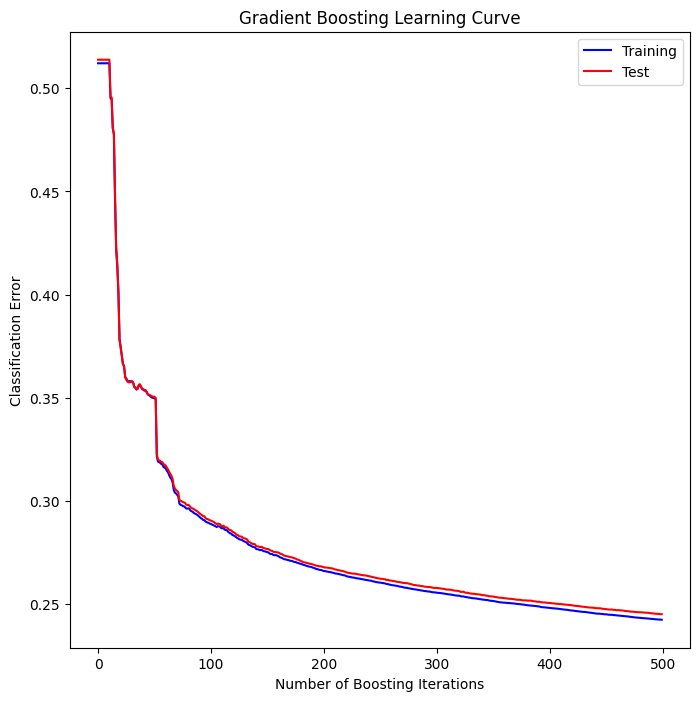

Test accuracy: 0.7547


In [4]:

# First part: Single model with learning curve plot
start_time = time.time()

gb_model = GradientBoostingClassifier(n_estimators=500,
                                    learning_rate=0.01, 
                                    max_depth=3,
                                    random_state=0)

gb_model.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")

# Get staged predictions for learning curve
test_error = []
for y_pred in gb_model.staged_predict(X_test):
    test_error.append(1 - accuracy_score(y_test, y_pred))  # Using 1-accuracy for error

train_error = []
for y_pred_train in gb_model.staged_predict(X_train):
    train_error.append(1 - accuracy_score(y_train, y_pred_train))

# Plot learning curves
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(np.arange(len(train_error)), train_error, 'b', label='Training')
ax.plot(np.arange(len(test_error)), test_error, 'r', label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.xlabel('Number of Boosting Iterations')
plt.title('Gradient Boosting Learning Curve')
plt.show()

# Final evaluation
y_pred = gb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")


In [6]:
# Second part: Grid search
num_estimators = np.arange(50, 401, 50)
num_depths = range(1, 7, 2)
num_samples_per_splits = range(4, 9, 4)

start_time = time.time()

param_grid = {'n_estimators': num_estimators,
              'max_depth': num_depths,
              'min_samples_split': num_samples_per_splits}

gb_model = GradientBoostingClassifier(learning_rate=0.02,
                                    random_state=0)

kfold = KFold(n_splits=5,
              shuffle=True,
              random_state=10)

grid = GridSearchCV(gb_model,
                   param_grid,
                   refit=True,
                   cv=kfold,
                   scoring='accuracy',
                   n_jobs=-1)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best parameters:", grid.best_params_)
print(f"Test accuracy: {accuracy:.4f}")
print(f"Grid search elapsed time: {time.time() - start_time:.2f} seconds")

/Users/ei.lyn/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ei.lyn/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ei.lyn/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ei.lyn/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed w

Best parameters: {'max_depth': 5, 'min_samples_split': 8, 'n_estimators': 400}
Test accuracy: 0.8213
Grid search elapsed time: 39221.22 seconds
